In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

datapath = os.path.join("data", "")

In [3]:
loan = pd.read_csv(datapath + "loan.csv", parse_dates=['applicationDate', 'originatedDate'])
payment = pd.read_csv(datapath + "payment.csv")
underwrite = pd.read_csv(datapath + "clarity_underwriting_variables.csv")

### Loan

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   loanId                            577426 non-null  object        
 1   anon_ssn                          577682 non-null  object        
 2   payFrequency                      576409 non-null  object        
 3   apr                               573760 non-null  float64       
 4   applicationDate                   577682 non-null  datetime64[ns]
 5   originated                        577682 non-null  bool          
 6   originatedDate                    46044 non-null   datetime64[ns]
 7   nPaidOff                          577658 non-null  float64       
 8   approved                          577682 non-null  bool          
 9   isFunded                          577682 non-null  int64         
 10  loanStatus                      

In [7]:
loan.isnull().sum()

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64

In [6]:
loan.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577658.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.037887,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.333366,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


<AxesSubplot:>

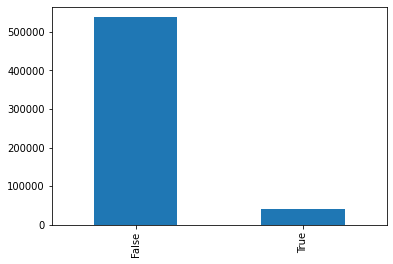

In [16]:
loan.approved.value_counts().plot.bar()

<AxesSubplot:>

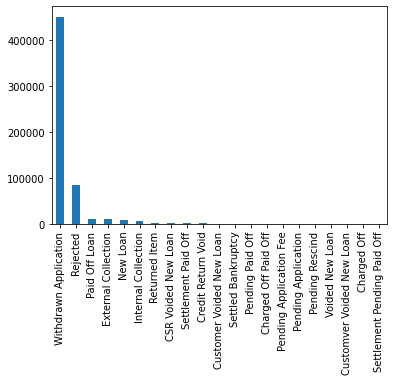

In [21]:
loan.loanStatus.value_counts().plot.bar()

<AxesSubplot:>

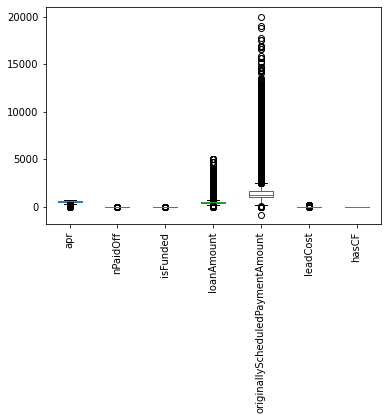

In [27]:
loan.plot.box(rot=90)

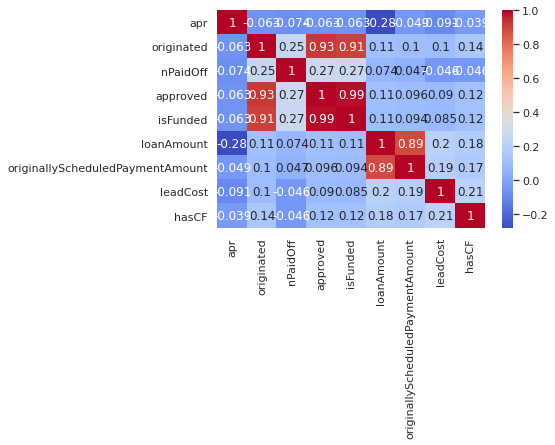

In [35]:
sns.heatmap(loan.corr(), annot=True, cmap='coolwarm');

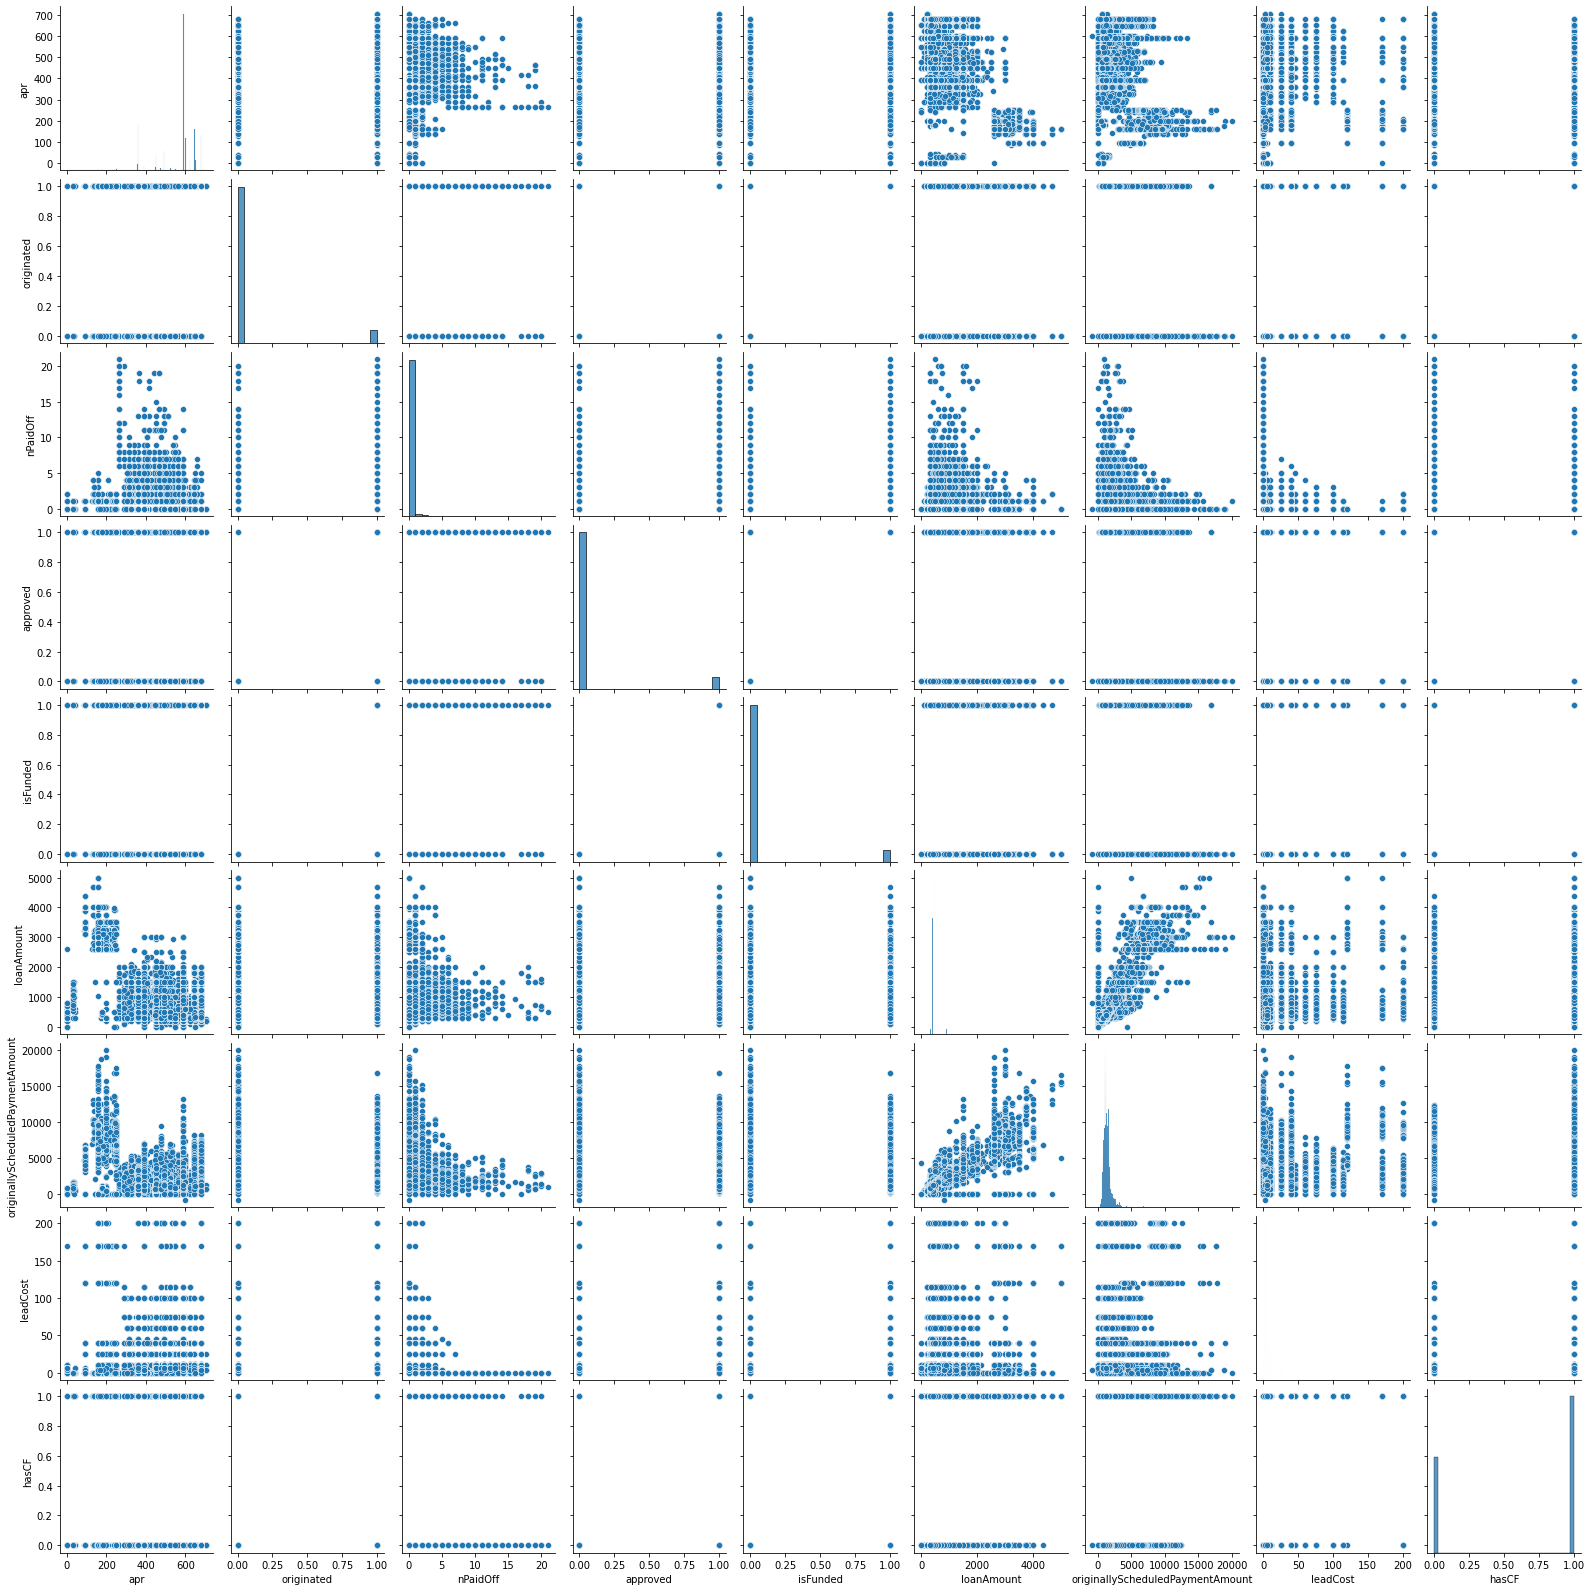

In [29]:
sns.pairplot(loan)

### Payment

In [43]:
payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode,count
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN,NaN


In [36]:
payment.describe()

,installmentIndex,principal,fees,paymentAmount
count,689364.000000,689364.000000,689364.000000,689364.000000
mean,10.553222,45.557543,67.003994,112.680232
std,8.049530,81.724683,59.789510,105.783710
min,1.000000,-303.370000,-42.560000,-337.700000
25%,5.000000,13.180000,28.820000,56.810000
50%,9.000000,27.610000,51.300000,86.340000
75%,14.000000,53.380000,86.440000,135.090000
max,105.000000,4000.000000,1257.710000,4063.600000


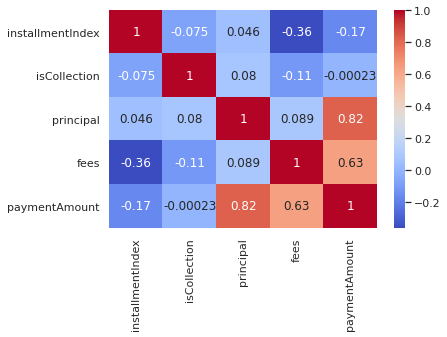

In [39]:
sns.heatmap(payment.corr(), annot=True, cmap='coolwarm');

<AxesSubplot:>

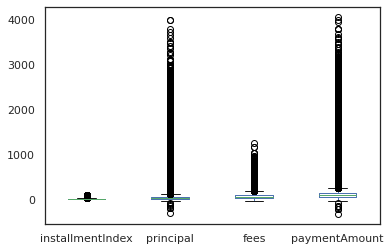

In [41]:
payment.plot.box()

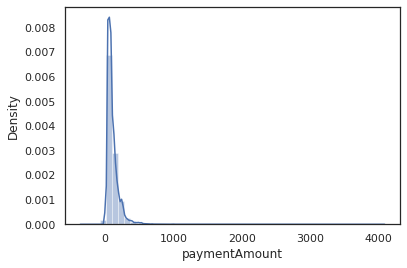

In [93]:
ax = sns.distplot(payment['paymentAmount'])
plt.show()

In [58]:
payment.groupby(["loanId"]).size()

loanId
LL-I-00000021    13
LL-I-00000231    20
LL-I-00000238    16
LL-I-00000308    22
LL-I-00000355    23
                 ..
LP-I-00000127    12
LP-I-00000134     7
LP-I-00000139    15
LP-I-00000142    13
LP-I-00000145    12
Length: 39952, dtype: int64

In [4]:
payment_mod = pd.DataFrame()
payment_mod['installment'] = payment.groupby(["loanId"]).size() #payment.loanId.value_counts()
payment_mod['checked'] = payment.groupby(["loanId", "paymentStatus"]).size().unstack()['Checked']
payment_mod['checkedRate'] = payment_mod["checked"] / payment_mod["installment"]
payment_mod['checkedRate'] = payment_mod['checkedRate'].round(decimals=3)
payment_mod = payment_mod.fillna(0)
payment_mod = payment_mod.reset_index()
payment_mod.head()

,loanId,installment,checked,checkedRate
0,LL-I-00000021,13,12.0,0.923
1,LL-I-00000231,20,2.0,0.100
2,LL-I-00000238,16,7.0,0.438
3,LL-I-00000308,22,1.0,0.045
4,LL-I-00000355,23,0.0,0.000


In [70]:
payment[payment['loanId'] == "LL-I-00000355"]

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode,count
71,LL-I-00000355,1,False,2014-12-11T05:00:00,0.00,52.60,52.60,Rejected,R02,NaN
72,LL-I-00000355,2,False,2014-12-24T05:00:00,17.00,92.05,109.05,Cancelled,NaN,NaN
73,LL-I-00000355,3,False,2014-12-24T05:00:00,17.00,92.05,109.05,None,NaN,NaN
74,LL-I-00000355,4,False,2015-01-08T05:00:00,20.13,88.92,109.05,Cancelled,NaN,NaN
75,LL-I-00000355,5,False,2015-01-08T05:00:00,20.13,88.92,109.05,None,NaN,NaN
76,LL-I-00000355,6,False,2015-01-22T05:00:00,23.83,85.22,109.05,Cancelled,NaN,NaN
77,LL-I-00000355,7,False,2015-01-22T05:00:00,23.83,85.22,109.05,None,NaN,NaN
78,LL-I-00000355,8,False,2015-02-05T05:00:00,28.22,80.83,109.05,Cancelled,NaN,NaN
79,LL-I-00000355,9,False,2015-02-05T05:00:00,28.22,80.83,109.05,None,NaN,NaN
80,LL-I-00000355,10,False,2015-02-19T05:00:00,33.42,75.63,109.05,Cancelled,NaN,NaN


### Merged

In [5]:
df = loan.merge(payment_mod, on='loanId', how='left')
df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,installment,checked,checkedRate
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,...,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,25.0,22.0,0.88
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,...,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1,NaN,NaN,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,...,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1,NaN,NaN,NaN
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05 22:31:34.304,False,NaT,0.0,False,0,...,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1,NaN,NaN,NaN


In [9]:
df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF',
       'installment', 'checked', 'checkedRate'],
      dtype='object')

In [13]:
for col in ['payFrequency', 'loanStatus']:
    df[col] = df[col].astype('category')
    
df.dtypes

loanId                                      object
anon_ssn                                    object
payFrequency                              category
apr                                        float64
applicationDate                     datetime64[ns]
originated                                    bool
originatedDate                      datetime64[ns]
nPaidOff                                   float64
approved                                      bool
isFunded                                     int64
loanStatus                                category
loanAmount                                 float64
originallyScheduledPaymentAmount           float64
state                                       object
leadType                                    object
leadCost                                     int64
fpStatus                                    object
clarityFraudId                              object
hasCF                                        int64
installment                    

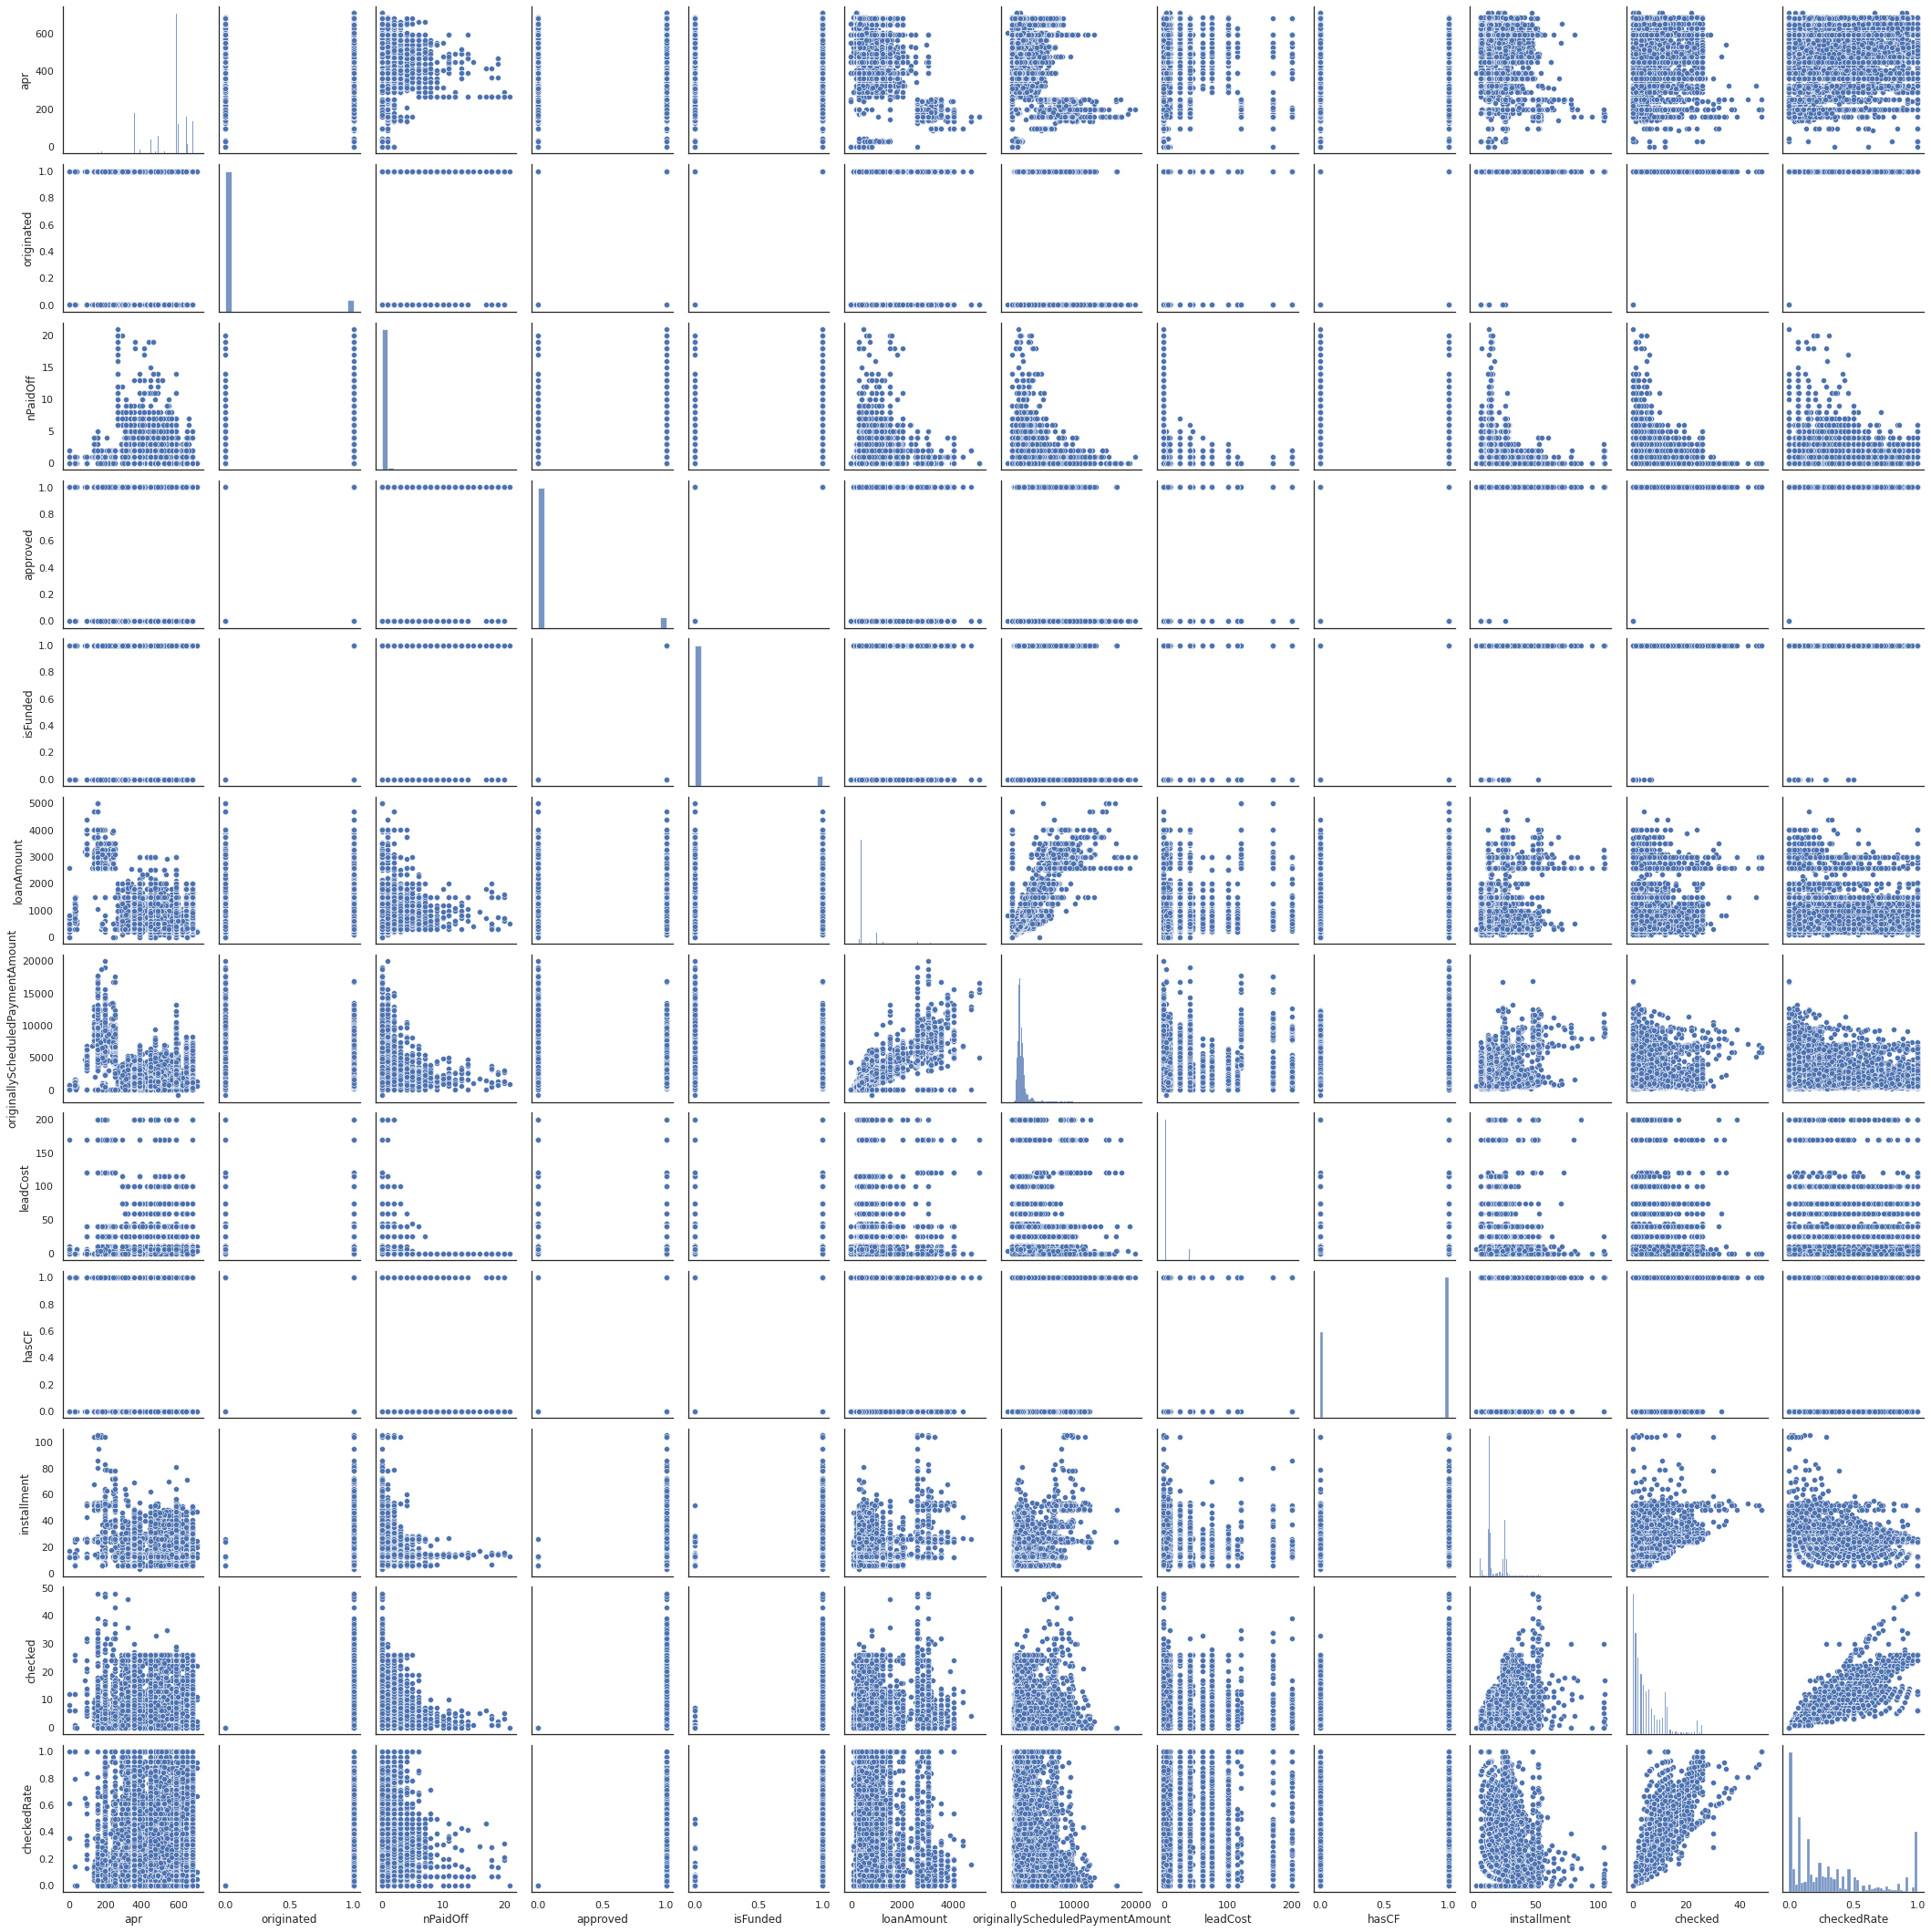

In [81]:
sns.pairplot(df)

In [6]:
df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF',
       'installment', 'checked', 'checkedRate'],
      dtype='object')

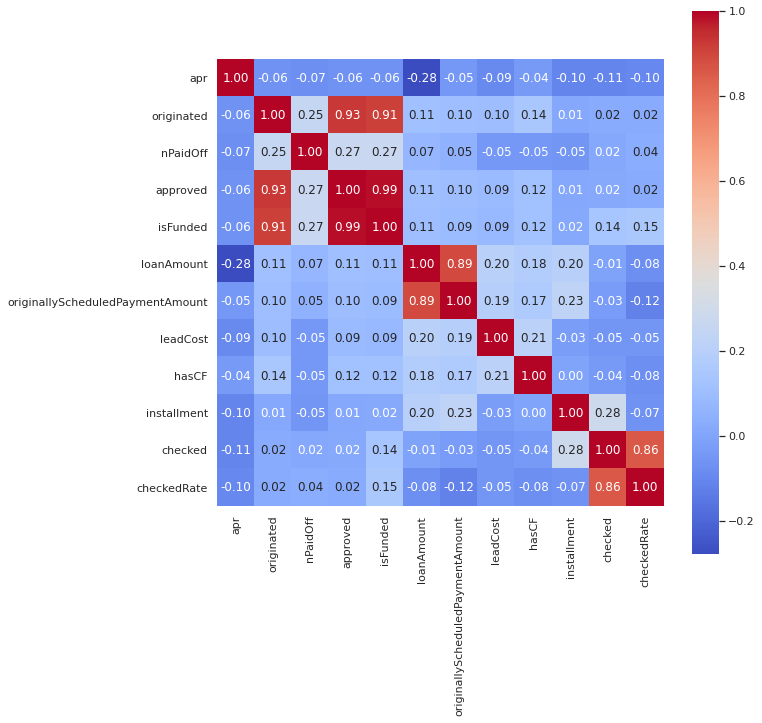

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, fmt='.2f');